In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from minisom import MiniSom

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('/home/codetrade/Downloads/CSV/Credit_Card_Applications.csv')

In [4]:
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
data.shape

(690, 16)

In [6]:
#Defining X veriables
X = data.iloc[:,1:14].values 
y = data.iloc[:,-1].values

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [8]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


In [9]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [10]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [11]:
# Defining the hyper parameter
som_grid_rows = 10
som_grid_columns = 10
iterations = 100
sigma = 1
learning_rate = 0.5

In [17]:
som = MiniSom(x=som_grid_rows, y=som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)
wts = som.get_weights()


In [18]:
wts.shape

(10, 10, 13)

In [23]:
som.distance_map

<bound method MiniSom.distance_map of <minisom.MiniSom object at 0x7fd738653fa0>>

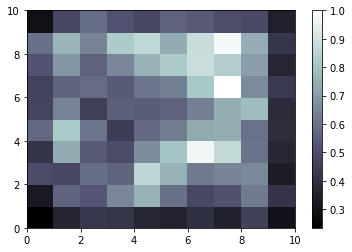

In [26]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

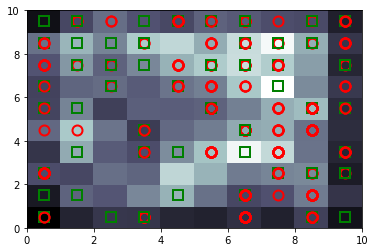

In [29]:

pcolor(som.distance_map().T)

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2    
    )

plt.show()

In [31]:
mapping=som.win_map(X)    

In [32]:
mapping

defaultdict(list,
            {(6,
              1): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
                     0.375     , 0.08473684, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.16      ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    ]), array([1.        , 0.17789474, 0.01196429, 0.5       , 0.23076923,
                     0.875     , 0.12280702, 0.    

mapping.key

In [33]:
mapping.keys()

dict_keys([(6, 1), (0, 2), (4, 7), (3, 9), (3, 3), (6, 3), (8, 4), (1, 1), (6, 0), (2, 7), (2, 6), (8, 2), (9, 3), (1, 9), (0, 5), (3, 8), (6, 9), (6, 4), (5, 7), (8, 1), (2, 9), (8, 0), (0, 0), (1, 8), (9, 7), (8, 5), (3, 0), (6, 8), (5, 5), (9, 6), (7, 7), (4, 6), (7, 3), (8, 9), (7, 8), (4, 9), (7, 5), (9, 9), (3, 4), (7, 4), (0, 8), (0, 6), (7, 2), (4, 3), (9, 2), (1, 3), (5, 3), (0, 7), (6, 7), (1, 7), (7, 6), (8, 8), (5, 9), (5, 8), (9, 5), (6, 6), (2, 0), (0, 9), (0, 4), (9, 8), (0, 1), (5, 6), (1, 5), (7, 1), (9, 0), (7, 9), (2, 8), (1, 4), (3, 7), (4, 1)])

In [34]:
len(mapping.keys())

70

In [35]:
mapping[(9,8)]

[array([1.        , 0.11022556, 0.36017857, 0.        , 0.69230769,
        0.875     , 0.04385965, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.13      ]),
 array([1.        , 0.73684211, 0.25      , 0.5       , 0.69230769,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        ]),
 array([1.        , 0.29819549, 0.01196429, 0.        , 0.92307692,
        0.375     , 0.00298246, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.09      ]),
 array([1.        , 0.15293233, 0.02089286, 0.        , 0.92307692,
        0.875     , 0.00438596, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.12      ]),
 array([1.        , 0.24180451, 0.07285714, 0.        , 1.        ,
        0.875     , 0.00140351, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.064     ]),
 array([1.        , 0.11774436, 0.02821429, 0.        , 0.92307692,
        0.375     , 0.

In [36]:
frauds=np.concatenate((mapping[(0,9)],mapping[(8,9)]),axis=0)

In [37]:
frauds

array([[0.        , 0.13037594, 0.40178571, 0.        , 1.        ,
        0.875     , 0.02631579, 1.        , 1.        , 0.05970149,
        0.        , 0.5       , 0.        ],
       [0.        , 0.16917293, 0.44035714, 0.5       , 0.92307692,
        0.875     , 0.12280702, 1.        , 1.        , 0.08955224,
        0.        , 0.5       , 0.2       ],
       [0.        , 0.06135338, 0.39285714, 0.5       , 1.        ,
        0.875     , 0.03508772, 1.        , 1.        , 0.1641791 ,
        0.        , 0.5       , 0.        ],
       [0.        , 0.20556391, 0.51785714, 0.5       , 1.        ,
        0.875     , 0.10824561, 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.06      ],
       [0.        , 0.16165414, 0.01785714, 0.5       , 0.76923077,
        0.875     , 0.05263158, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.14      ],
       [0.        , 0.40721805, 0.35714286, 0.5       , 0.76923077,
        0.875     , 0.06140

In [38]:
frauds.shape

(12, 13)

In [39]:
fraud1=sc.inverse_transform(frauds)

In [40]:
pd.DataFrame(fraud1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,22.42,11.250,1.0,14.0,8.0,0.750,1.0,1.0,4.0,0.0,2.0,0.0
1,0.0,25.00,12.330,2.0,13.0,8.0,3.500,1.0,1.0,6.0,0.0,2.0,400.0
2,0.0,17.83,11.000,2.0,14.0,8.0,1.000,1.0,1.0,11.0,0.0,2.0,0.0
3,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0
4,0.0,24.50,0.500,2.0,11.0,8.0,1.500,1.0,0.0,0.0,0.0,2.0,280.0
5,0.0,40.83,10.000,2.0,11.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,29.0
6,0.0,25.17,2.875,2.0,14.0,8.0,0.875,1.0,0.0,0.0,0.0,2.0,360.0
7,0.0,20.50,11.835,2.0,8.0,8.0,6.000,1.0,0.0,0.0,0.0,2.0,340.0
8,0.0,24.58,0.670,2.0,6.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,400.0
9,0.0,32.33,0.540,2.0,13.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,440.0
